In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pyplot_image_show(image,cmap = 'gray',figsize = (18,9)):
    plt.figure(figsize = figsize)
    plt.imshow(image,cmap='gray')
    plt.title(str((image.min(),image.max())))
    
def pyplot_comparative_show(image_1,image_2,cmap = 'gray',figsize = (18,9)):
    _,(ax1,ax2) = plt.subplots(1,2,figsize=figsize)
    ax1.imshow(image_1,cmap='gray')
    ax2.imshow(image_2,cmap='gray')
    ax1.set_title(str((image_1.min(),image_1.max())))
    ax2.set_title(str((image_2.min(),image_2.max())))
    
def pyplot_comparative_show_3(image_1,image_2,image_3,cmap = 'gray',figsize = (18,9)):
    _,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=figsize)
    ax1.imshow(image_1,cmap='gray')
    ax2.imshow(image_2,cmap='gray')
    ax3.imshow(image_3,cmap='gray')
    ax1.set_title(str((image_1.min(),image_1.max())))
    ax2.set_title(str((image_2.min(),image_2.max())))
    ax3.set_title(str((image_3.min(),image_3.max())))

# Load Stock Image

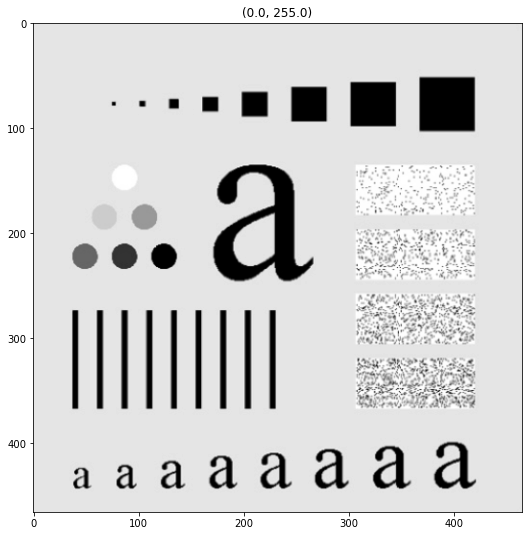

In [71]:
image_stock = cv2.imread("a.png", cv2.IMREAD_GRAYSCALE).astype('float')
pyplot_image_show(image_stock)

# Find the spectre of an image(openCV)

In [72]:
def apply_filter_to_image(image,filter):
    dft = cv2.dft(image,flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    dft_shift = dft_shift * np.dstack([filter] * 2)
    rev_dft = np.fft.ifftshift(dft_shift)
    rev_image = cv2.idft(rev_dft,flags=cv2.DFT_COMPLEX_OUTPUT)
    rev_image_float = cv2.magnitude(rev_image[:,:,0],rev_image[:,:,1])
    return rev_image_float

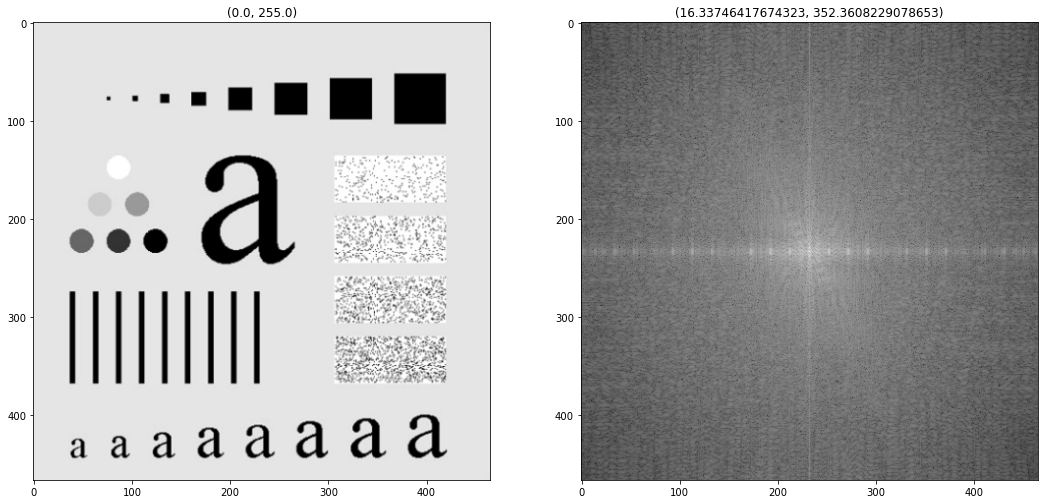

In [73]:
ffd_image_2 = cv2.dft(np.float64(image_stock),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(ffd_image_2)

magnitude_spectrum_2 = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
pyplot_comparative_show(image_stock,magnitude_spectrum_2)

# Construct Frequency Filter(ideal)

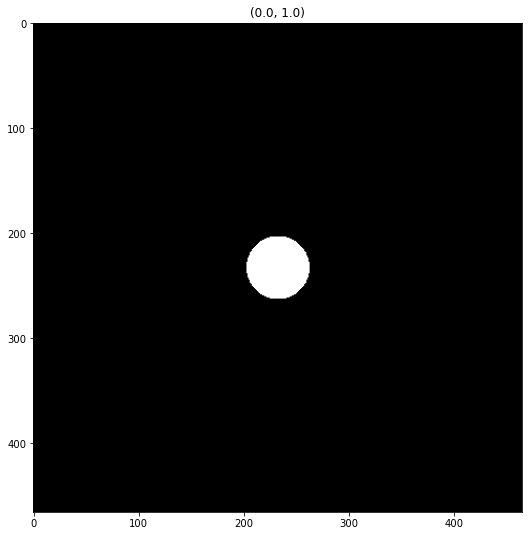

In [86]:
dim_1 = 10
low_pass_filter = np.zeros_like(image_stock)
x_div = image_stock.shape[0]/2
y_div = image_stock.shape[1]/2
for i in range(image_stock.shape[0]):
    for j in range(image_stock.shape[1]):
        if ((i - x_div)**2+(j-y_div)**2 <= 900):
            low_pass_filter[i,j] = 1
pyplot_image_show(low_pass_filter)

# Apply Ideal Filter

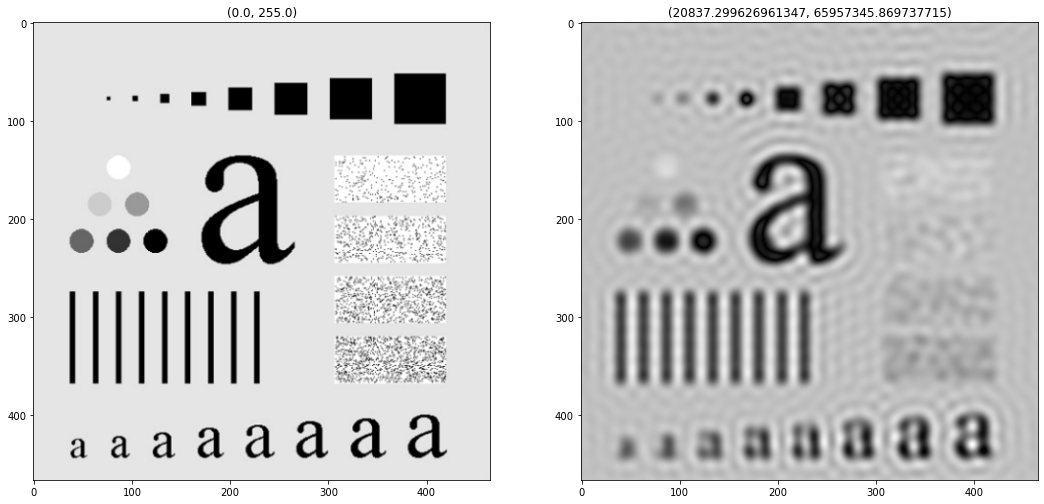

In [87]:
image_ideal_filt = apply_filter_to_image(image_stock,low_pass_filter)
pyplot_comparative_show(image_stock,image_ideal_filt)

#